In [176]:
# Imports
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt 

In [177]:
# FEL
#path = "../FEL"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
                                                                      
# FEL - KeepAligned
#path = "../subsampled_fasta_keepAligned_Results"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]

# FEL on Subsampling_with_TN93-Algo , used BDNF alignment not p53
#path = "../../Test_TN93_algo_subsamples"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
#output_header = "BDNF_TN93Algo_FEL_AllBranches"

# FEL Internal on Subsampling_with_TN93-Algo, used BDNF alignment not p53
#path = "../../Test_TN93_algo_subsamples"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL_internal.json")]
#output_header = "BDNF_TN93Algo_FEL_InternalBranches"

# January 8 2022
#path = "../Results/TP53"
#files = [path + "/" + f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
#output_header = "MESSI_TP53_FEL"

#TP53_simulations_o1
#path = "../Results/TP53_simulations_o1"
#files = [path + "/" + f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
#output_header = "MESSI_TP53_simulations_o1_FEL"

#TP53_simulations_o01
#path = "../Results/TP53_simulations_o01"
#files = [path + "/" + f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
#output_header = "MESSI_TP53_simulations_o01_FEL"

#TP53_simulations_o10
#path = "../Results/TP53_simulations_o10"
#files = [path + "/" + f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
#output_header = "MESSI_TP53_simulations_o10_FEL"

#HIV_RT
tag = "HIV_RT"
analysis_type = "empirical"
#path = "../Results/HIV_RT"
path = os.path.join("..", "Results", tag)
print("#", path)
files = [path + "/" + f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
output_header = "MESSI_" + tag + "_" + analysis_type + "_FEL"


files

# ../Results/HIV_RT


['../Results/HIV_RT/HIV_RT.fasta.348.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.257.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.129.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.220.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.297.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.388.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.170.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.366.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.279.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.83.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.34.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.443.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.434.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.311.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.fasta.43.subsampled.fasta.FEL.json',
 '../Results/HIV_RT/HIV_RT.f

In [178]:
def return_positive_sites_count(MLE):
    global pvalue_threshold
    data_list = []
    count = 0
    for n, item in enumerate(MLE):
        if float(item[4] < pvalue_threshold): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega > 1.0:
                count += 1
                site = n + 1
                data_list.append(site)
            #end if
        #end if
    #end for
    return count, data_list
#end method

def return_negative_sites_count(MLE):
    global pvalue_threshold
    data_list = []
    count = 0
    for n, item in enumerate(MLE):
        if float(item[4] < pvalue_threshold): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega < 1.0:
                count += 1
                site = n + 1
                data_list.append(site)
            #end if
        #end if
    #end for
    return count, data_list
#end method

In [179]:
# Main -------------------------------------------------
data_dict = {}
pvalue_threshold = 0.1
count = 1
#print("#, Filename, Num_Sequences, Num_Sites")
for filename in files:
    if os.stat(filename).st_size == 0: 
        print("# ERROR:", filename)
        continue
        
    with open(filename, "r") as fh:
        json_data = json.load(fh)
    #end with
    
    omega_initial_fit = json_data["fits"]["Global MG94xREV"]["Rate Distributions"][ "non-synonymous/synonymous rate ratio for *test*"][0][0]
    
    num_seqs = json_data["input"]["number of sequences"]
    num_sites = json_data["input"]["number of sites"]
    
    #print(count, filename.split("/")[-1], num_seqs, num_sites)
    
    positive_sites, positive_sites_list = return_positive_sites_count(json_data["MLE"]["content"]["0"])
    negative_sites, negative_sites_list = return_negative_sites_count(json_data["MLE"]["content"]["0"])
    
    # p-values
    p_values_list = []
    for item in json_data["MLE"]["content"]["0"]:
        p_value = item[4]
        p_values_list.append(p_value)
    #end for
    
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    data_dict[count] = {"Filename":filename.split("/")[-1],
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "negative_sites": negative_sites, 
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "negative_sites_list" : negative_sites_list,
                        "p_values":p_values_list,
                       "Global_MG94xREV_omega": omega_initial_fit}
            
    count += 1
#end for

In [180]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df

Filename  num_seqs  num_sites  \
1    HIV_RT.fasta.348.subsampled.fasta.FEL.json       348        335   
2    HIV_RT.fasta.257.subsampled.fasta.FEL.json       257        335   
3    HIV_RT.fasta.129.subsampled.fasta.FEL.json       129        335   
4    HIV_RT.fasta.220.subsampled.fasta.FEL.json       220        335   
5    HIV_RT.fasta.297.subsampled.fasta.FEL.json       297        335   
..                                          ...       ...        ...   
469  HIV_RT.fasta.171.subsampled.fasta.FEL.json       171        335   
470  HIV_RT.fasta.106.subsampled.fasta.FEL.json       106        335   
471  HIV_RT.fasta.310.subsampled.fasta.FEL.json       310        335   
472   HIV_RT.fasta.42.subsampled.fasta.FEL.json        42        335   
473  HIV_RT.fasta.435.subsampled.fasta.FEL.json       435        335   

     negative_sites  positive_sites  \
1               226               9   
2               228               8   
3               213               8   
4               224               9   
5               227               8   
..              ...             ...   
469             221               8   
470             205               8   
471             226               9   
472             180               5   
473             231              10   

                                   positive_sites_list  \
1         [35, 102, 103, 165, 200, 211, 245, 272, 286]   
2              [35, 102, 165, 188, 200, 211, 245, 286]   
3             [102, 165, 178, 188, 200, 211, 245, 272]   
4         [35, 102, 165, 188, 200, 211, 245, 272, 286]   
5              [35, 102, 165, 200, 211, 245, 272, 286]   
..                                                 ...   
469           [102, 165, 188, 200, 211, 245, 272, 286]   
470           [102, 165, 178, 188, 200, 211, 245, 272]   
471       [35, 102, 103, 165, 200, 211, 245, 272, 286]   
472                          [102, 103, 200, 245, 272]   
473  [35, 102, 103, 165, 200, 211, 245, 248, 272, 286]   

                                   negative_sites_list  \
1    [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   
2    [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   
3    [1, 2, 3, 9, 12, 13, 15, 18, 19, 22, 23, 26, 2...   
4    [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   
5    [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   
..                                                 ...   
469  [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   
470  [1, 2, 3, 12, 13, 15, 18, 19, 22, 23, 26, 27, ...   
471  [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   
472  [1, 2, 3, 4, 12, 13, 15, 18, 19, 20, 21, 22, 2...   
473  [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   

                                              p_values  Global_MG94xREV_omega  
1    [4.807722962019145e-05, 1.0891998580842e-07, 0...               0.178045  
2    [0.0001576616803831143, 2.898612860291472e-06,...               0.169112  
3    [0.0005185562963404555, 6.232131484362746e-05,...               0.173154  
4    [0.0003159109659590653, 2.539189987049717e-06,...               0.170117  
5    [4.58637043072585e-05, 5.828925463413626e-07, ...               0.172752  
..                                                 ...                    ...  
469  [0.0003663559697784091, 1.935830337695954e-06,...               0.167763  
470  [0.001871368373067228, 0.0003548725862111413, ...               0.174876  
471  [4.647627407639021e-05, 5.65031880284117e-07, ...               0.174370  
472  [0.02309688261540355, 0.08181174522267143, 0.0...               0.173023  
473  [3.779297150996452e-05, 1.085314403903581e-07,...               0.181986  

[473 rows x 9 columns]

In [181]:
df.sort_values(by=['num_seqs'], ascending=True, inplace=True)
df = df.reset_index(drop=True)
df.index += 1
df

Filename  num_seqs  num_sites  \
1      HIV_RT.fasta.3.subsampled.fasta.FEL.json         3        335   
2      HIV_RT.fasta.4.subsampled.fasta.FEL.json         4        335   
3      HIV_RT.fasta.5.subsampled.fasta.FEL.json         5        335   
4      HIV_RT.fasta.6.subsampled.fasta.FEL.json         6        335   
5      HIV_RT.fasta.7.subsampled.fasta.FEL.json         7        335   
..                                          ...       ...        ...   
469  HIV_RT.fasta.471.subsampled.fasta.FEL.json       471        335   
470  HIV_RT.fasta.472.subsampled.fasta.FEL.json       472        335   
471  HIV_RT.fasta.473.subsampled.fasta.FEL.json       473        335   
472  HIV_RT.fasta.474.subsampled.fasta.FEL.json       474        335   
473  HIV_RT.fasta.475.subsampled.fasta.FEL.json       475        335   

     negative_sites  positive_sites  \
1                73               0   
2                88               0   
3               101               0   
4               109               0   
5               118               1   
..              ...             ...   
469             231              10   
470             231              10   
471             231              10   
472             231              10   
473             231              10   

                                   positive_sites_list  \
1                                                   []   
2                                                   []   
3                                                   []   
4                                                   []   
5                                                [245]   
..                                                 ...   
469  [35, 102, 103, 165, 200, 211, 245, 248, 272, 286]   
470  [35, 102, 103, 165, 200, 211, 245, 248, 272, 286]   
471  [35, 102, 103, 165, 200, 211, 245, 248, 272, 286]   
472  [35, 102, 103, 165, 200, 211, 245, 248, 272, 286]   
473  [35, 102, 103, 165, 200, 211, 245, 248, 272, 286]   

                                   negative_sites_list  \
1    [2, 4, 21, 37, 40, 56, 62, 65, 66, 67, 68, 79,...   
2    [2, 3, 4, 21, 37, 40, 42, 54, 56, 57, 62, 64, ...   
3    [1, 2, 3, 4, 21, 29, 37, 40, 42, 54, 56, 57, 5...   
4    [1, 2, 3, 4, 21, 23, 29, 37, 40, 42, 54, 56, 5...   
5    [1, 2, 3, 4, 21, 23, 27, 29, 37, 40, 42, 45, 5...   
..                                                 ...   
469  [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   
470  [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   
471  [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   
472  [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   
473  [1, 2, 3, 9, 12, 13, 15, 18, 19, 21, 22, 23, 2...   

                                              p_values  Global_MG94xREV_omega  
1    [1, 0.02888784999452076, 1, 0.0545300377679223...               0.066015  
2    [1, 0.04965352683570623, 0.01338007583439027, ...               0.080589  
3    [0.06445186985405793, 0.06352893628736711, 0.0...               0.102771  
4    [0.07103484295840912, 0.0716361705642522, 0.01...               0.126322  
5    [0.08599926499875421, 0.07310685486776203, 0.0...               0.137678  
..                                                 ...                    ...  
469  [3.8355179485694e-05, 1.062670770268781e-07, 0...               0.182099  
470  [3.829319887849181e-05, 1.067605884808032e-07,...               0.182059  
471  [3.831639373852447e-05, 1.065402933653203e-07,...               0.182088  
472  [3.832643410861536e-05, 1.063970712644746e-07,...               0.182059  
473  [3.838023513125233e-05, 1.064523059701727e-07,...               0.182024  

[473 rows x 9 columns]

In [182]:
import numpy as np
def plot_df(df, y, tag, ylabel="Number of Sites"):
    global output_header
    plt.figure()
    df.sort_values(by=['num_seqs'], ascending=False).plot(kind="line", lw=4, y=y, color="skyblue", x="num_seqs", markerfacecolor='black', marker='o', markersize=6, rot=90, figsize=(12,12))
    plt.xticks(fontsize= 20 )
    plt.yticks(fontsize= 20 )
    plt.xlabel('Number of Sequences',  fontsize=24)
    plt.ylabel(ylabel, fontsize=24)
    #plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.savefig("../Plotting/" + output_header + tag)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.show()
#end method


## Plots

In [183]:
# What happens to eat sites dNdS?




<Figure size 432x288 with 0 Axes>

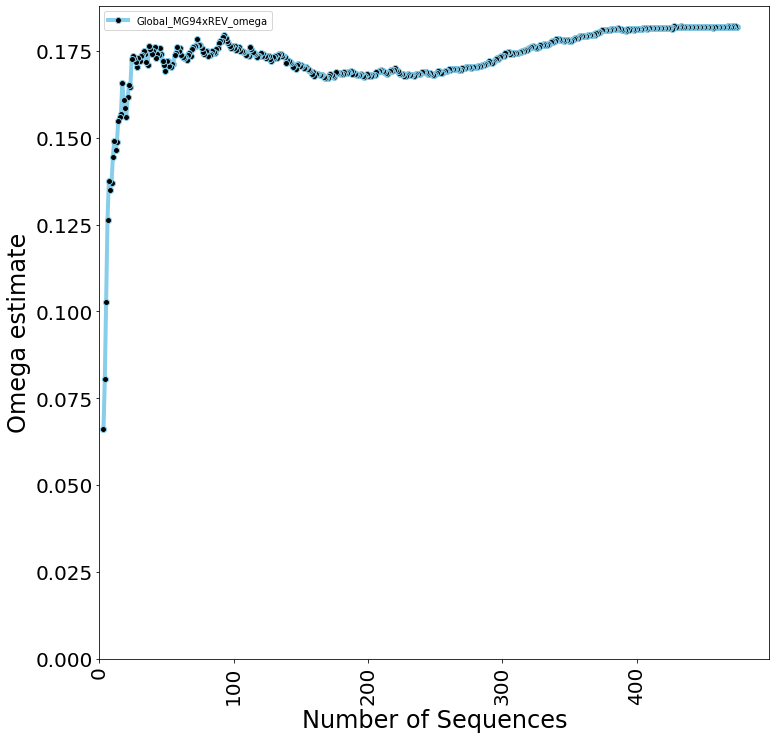

In [184]:
plot_df(df, "Global_MG94xREV_omega", "_GlobalOmega.png", "Omega estimate")

<Figure size 432x288 with 0 Axes>

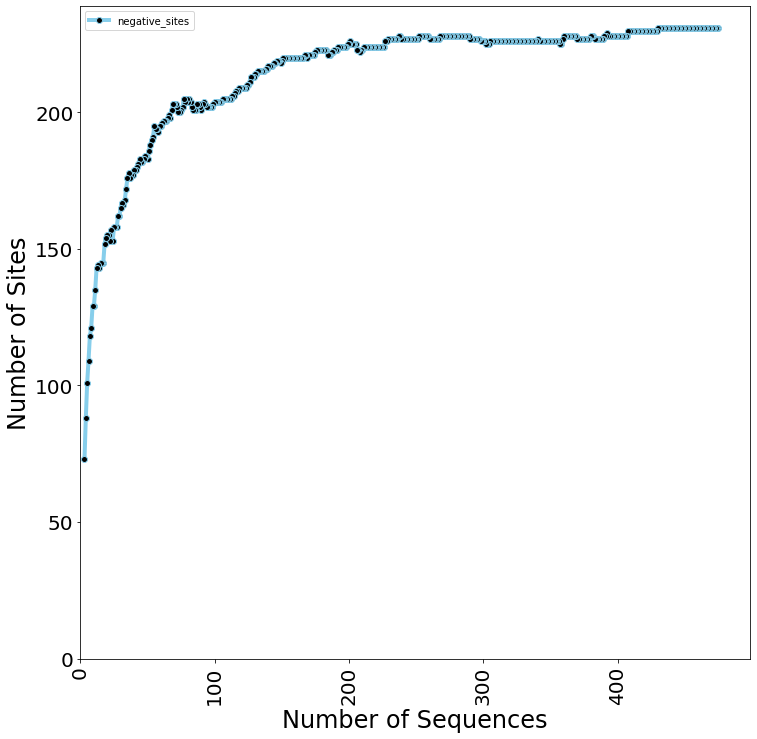

In [185]:
# df.sort_values(by=['num_seqs'], ascending=False).plot(kind="line", lw=4, y="negative_sites", x="num_seqs", markerfacecolor='black', marker='.', markersize=12, rot=90, figsize=(12,12))
plot_df(df, "negative_sites", "_NegativeSites.png")

<Figure size 432x288 with 0 Axes>

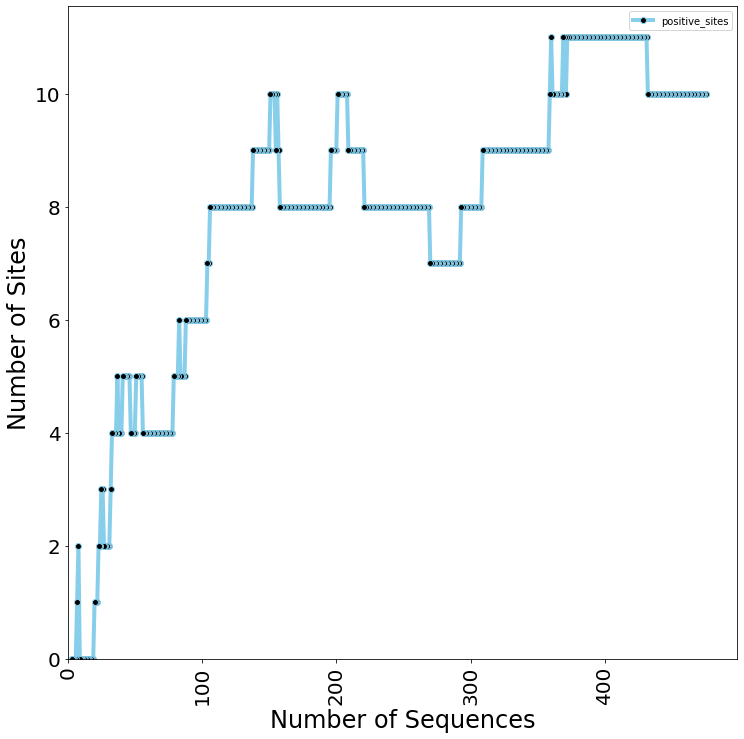

In [186]:
plot_df(df, "positive_sites", "_PositiveSites.png")

In [187]:
# Follow sites plot

In [188]:
# I need number of sites X axis 
# y-axis, have categorical values (site X, site Y), and display a dot if site X is selected for N sequences?


In [189]:
# Need to transpose the data.

nd_dict = {}
count = 1

for index, row in df.iterrows():
    #print(row['c1'], row['c2'])
    #print(row["positive_sites_list"])
    for item in row["positive_sites_list"]:
        #print(item, row["Filename"])
        nd_dict[count] = {"Filename": row["Filename"],
                         "num_seqs": row["num_seqs"],
                         "PositiveSite": item}
        count += 1
    
    
    
"""
    data_dict[count] = {"Filename":filename.split("/")[-1],
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "negative_sites": negative_sites, 
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "negative_sites_list" : negative_sites_list,
                        "p_values":p_values_list}
"""

'\n    data_dict[count] = {"Filename":filename.split("/")[-1],\n                        "num_seqs": num_seqs, \n                        "num_sites" :num_sites,\n                        "negative_sites": negative_sites, \n                        "positive_sites" : positive_sites,\n                        "positive_sites_list" : positive_sites_list,\n                        "negative_sites_list" : negative_sites_list,\n                        "p_values":p_values_list}\n'

In [190]:
#nd_dict
df2 = pd.DataFrame.from_dict(nd_dict, orient='index')
df2.sort_values(by=['PositiveSite'], ascending=True, inplace=True)
df2 = df2.reset_index(drop=True)
df2.index += 1
a = set(df2["PositiveSite"])
df2['PositiveSite'] = df2['PositiveSite'].astype(str)
df2

Filename  num_seqs PositiveSite
1     HIV_RT.fasta.401.subsampled.fasta.FEL.json       401           35
2     HIV_RT.fasta.209.subsampled.fasta.FEL.json       209           35
3     HIV_RT.fasta.210.subsampled.fasta.FEL.json       210           35
4     HIV_RT.fasta.457.subsampled.fasta.FEL.json       457           35
5     HIV_RT.fasta.300.subsampled.fasta.FEL.json       300           35
...                                          ...       ...          ...
3719  HIV_RT.fasta.406.subsampled.fasta.FEL.json       406          286
3720  HIV_RT.fasta.245.subsampled.fasta.FEL.json       245          286
3721  HIV_RT.fasta.252.subsampled.fasta.FEL.json       252          286
3722  HIV_RT.fasta.475.subsampled.fasta.FEL.json       475          286
3723   HIV_RT.fasta.83.subsampled.fasta.FEL.json        83          288

[3723 rows x 3 columns]

In [191]:
#a = set(df2["PositiveSite"])
#b = list(a).sort(key = int)
#print([a])
b = sorted(list(a), reverse=False)
print(b)



[35, 48, 102, 103, 165, 173, 177, 178, 188, 200, 211, 245, 248, 272, 286, 288]


In [192]:
c = [str(i) for i in b]
c

['35',
 '48',
 '102',
 '103',
 '165',
 '173',
 '177',
 '178',
 '188',
 '200',
 '211',
 '245',
 '248',
 '272',
 '286',
 '288']

In [193]:
d = sorted(list(c), key=int, reverse=True)
d

['288',
 '286',
 '272',
 '248',
 '245',
 '211',
 '200',
 '188',
 '178',
 '177',
 '173',
 '165',
 '103',
 '102',
 '48',
 '35']

In [197]:
# This is good

source = df2

chart = alt.Chart(source).mark_circle(size=80).encode(
    x='num_seqs',
    y=alt.Y('PositiveSite', sort=d),
    tooltip=['Filename']
).properties(
    width=800,
    height=600
).configure_axis(
    labelFontSize=20,
    titleFontSize=20
).configure_title(fontSize=24)

chart

alt.Chart(...)

In [195]:
"""
source = df2

chart = alt.Chart(source).mark_circle(size=80).encode(
    x='num_seqs',
    y=alt.Y('PositiveSite'),
    tooltip=['Filename']
).properties(
    width=800,
    height=600
).configure_axis(
    labelFontSize=20,
    titleFontSize=20
)

chart
"""

"\nsource = df2\n\nchart = alt.Chart(source).mark_circle(size=80).encode(\n    x='num_seqs',\n    y=alt.Y('PositiveSite'),\n    tooltip=['Filename']\n).properties(\n    width=800,\n    height=600\n).configure_axis(\n    labelFontSize=20,\n    titleFontSize=20\n)\n\nchart\n"

In [196]:
source = df

chart = alt.Chart(source).mark_line(size = 2, point=alt.OverlayMarkDef(color="black")).encode(
    x='num_seqs',
    y=alt.Y("positive_sites"),
    tooltip=['Filename']
).properties(
    width=800,
    height=600
).configure_axis(
    labelFontSize=20,
    titleFontSize=20
)

chart


#alt.Chart(source).mark_line(
#    point=alt.OverlayMarkDef(color="red")
#)

alt.Chart(...)